<a href="https://colab.research.google.com/github/ashwingeeni12/data_science_fundamentals/blob/main/Unit_2/Ashwin_GeenU2proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##My Context##
The question I am trying to answer is, do even or odd numbers have a higher likelihood being chosen from the Powerball lottery. For some context, the Powerball is a type of lotttery where you pick 5 white balls from 1-69 and 1 red ball from 1-26. Then they draw these balls through mixing them in a big bowl with an air jet that pushes a ball up to generate the winning numbers. There is only one copy of each number for each ball type. So only 1 white 22 ball will exist but a red 22 ball will exist as well.

##My Prior##
When creating my prior I am assuming one thing. That the conditions it was drawn is the same, ex. no external interference, time to mix was standard, amount of air exerted, balls were the same mass, etc. So, now what do I think the data will show. Well the white balls are numbered from 1-69 which means it has 35 odd numbers and 34 even. The red balls are numbered 1-26 with 13 odd numbers and 13 even. So because in the white balls their is 1 more odd number the data will show that odd numbers are more likely by a small margin. Because I believe odd numbers will be more likely we can set that as our alpha and the amount of even numbers as our beta. Also, due to my assumption of standardized conditions we can add the red ball data to the white ball data.

#Install & Imports

In [ ]:
!pip install "preliz[full,notebook]"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 907.7 kB/s eta 0:00:00
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.6/70.6 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 516.3/516.3 kB 24.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 505.6/505.6 kB 22.9 MB/s eta 0:00:00
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
  Attempting uninstall: nbclient
    Found existing installation: nbclient 0.10.0
    Uninstalling nbclient-0.10.0:
      Successfully uninstalled nbclient-0.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency c

In [ ]:
import pandas as pd
import numpy as np
import preliz as pz
import arviz as az
import pymc as pm

#Prior

In [43]:
total_odds = 35 + 13
total_evens = 34 + 13

In [ ]:
pz.Beta(alpha=total_odds,beta=total_evens).plot_pdf()

In [57]:
pz.Beta(alpha=total_odds,beta=total_evens).mean()

0.5052631578947369

#Data Grabbing

In [51]:
#Grabbing the data from my GitHub.
dataset_url = 'https://raw.githubusercontent.com/ashwingeeni12/data_science_fundamentals/main/Unit_2/Lottery_Powerball_Winning_Numbers__Beginning_2010.csv'
lottery = pd.read_csv(dataset_url)

In [52]:
#Here I am creating 2 lists where I will put all the even and odd numbers.
evens = []
odds = []

#I am setting the column to a variable to make it easier to type.
numbers = lottery['Winning Numbers'];

<Axes: title={'center': 'θ'}>

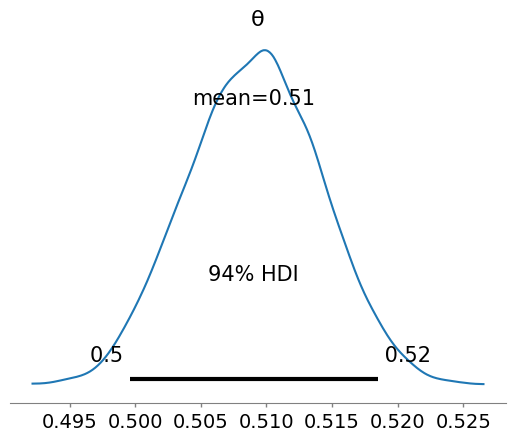

In [53]:
#The spreadsheet I got for my data had 1 big column with all the winning numbers formatted in 1 string like "12 13 27 19 30 1"
#So I had to extract each number individually and then check if they were even or odd

#Iterating through the column to get each individual set of winning numbers
for index, numbers in enumerate(numbers):

  #Setting the set to a list of individual numbers so "12 13 27 19 30 1" -----> ["12", "13", "27", "19", "30", "1"]
  list_num = numbers.split(" ")

  #Iterates through each index for the list of indivudual numbers
  for i in range(0,6):

    #checks if even, have to use int() because the given data type is a string
    if int(list_num[i])%2 == 0:
      #adds to list of even numbers
      evens.append(int(list_num[i]))

    else:
      #adds to list of odd numbers
      odds.append(int(list_num[i]))

In [ ]:
#Calculates the length of each of the lists which will get the number of odd and even numbers total.
a = len(odds)
b = len(evens)

#Calculating

<Axes: title={'center': 'θ'}>

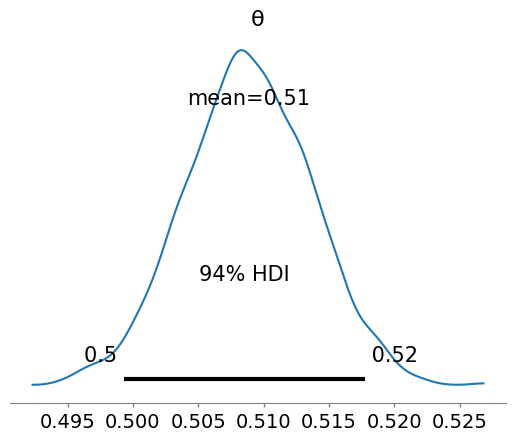

In [55]:
#Puts odds and evens into 1 big array
t_lottery_data = np.repeat([1,0], repeats = [a,b])

with pm.Model() as t_lottery_model:
  #Setting our prior
  θ = pm.Beta('θ' , alpha = 48. , beta = 47.)

  #Setting our likelihood
  y = pm.Bernoulli('y', p = θ, observed = t_lottery_data)

  #sampling from our posterior
  lottery_t = pm.sample(2000)

#graph of pymc posterior model using 2000 samples
az.plot_posterior(lottery_t)

##PyMC Model Comments##
The PyMC model shows the mean at .51 or a 51% likelihood that an odd number will be chosen. This alligns with my prior as the priors mean was .505 which is similar to the PyMC models mean. Both models showed that the mean is greater than a pure 50 50 chance which alligns with what I thought. Now does this mean chose only odd numbers, probably not. However, if you are tore between choosing an odd or even for your last number that 1% may come in clutch.  